## Creating a Net-Zero Momentum Sector Strategy

We have already seen a Momentum Cross Over strategy in session two.

Now, instead, we will implement a Zero Momentum Basket. Our basket will only contain Equity (Stocks).

A basket here is simply a combination of individual stocks with different weightings

Remember to checkout the old notebooks if you've forgotten any methods from previous weeks:

https://imperialcollegelondon.app.box.com/s/rq3he3gb5mq2tlzzyhxh5q8s3iv82wfg

**1a)** Read in the [AAPL, META, GOOG, AMZN, MSFT, TSLA] Stock Adjusted Close Prices using Yahoo Finance from Start of 2017 - End of 2019 into a DataFrame (df) (1 Mark)

In [2]:
! pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/var/folders/1f/rjjb6d_j1nx2wjjbspryf95r0000gn/T/ipykernel_17415/3555543230.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
ticker = ['AAPL', 'META', 'GOOG', 'AMZN', 'MSFT', 'TSLA'] 
stocks = yf.download(ticker, start = '2017-01-01', end = '2019-12-31')
#df = 

#Output head of df
stocks.head()

[*********************100%***********************]  6 of 6 completed


Adj Close                                                          \
                 AAPL       AMZN       GOOG        META       MSFT       TSLA   
Date                                                                            
2017-01-03  27.133326  37.683498  39.306999  116.860001  57.501350  14.466000   
2017-01-04  27.102953  37.859001  39.345001  118.690002  57.244072  15.132667   
2017-01-05  27.240788  39.022499  39.701000  120.669998  57.244072  15.116667   
2017-01-06  27.544472  39.799500  40.307499  123.410004  57.740250  15.267333   
2017-01-09  27.796774  39.846001  40.332500  124.900002  57.556484  15.418667   

                Close                                    ...       Open  \
                 AAPL       AMZN       GOOG        META  ...       GOOG   
Date                                                     ...              
2017-01-03  29.037500  37.683498  39.306999  116.860001  ...  38.940498   
2017-01-04  29.004999  37.859001  39.345001  118.690002  ...  39.417999   
2017-01-05  29.152500  39.022499  39.701000  120.669998  ...  39.304001   
2017-01-06  29.477501  39.799500  40.307499  123.410004  ...  39.763000   
2017-01-09  29.747499  39.846001  40.332500  124.900002  ...  40.320000   

                                                 Volume                       \
                  META       MSFT       TSLA       AAPL       AMZN      GOOG   
Date                                                                           
2017-01-03  116.029999  62.790001  14.324000  115127600   70422000  33146000   
2017-01-04  117.550003  62.480000  14.316667   84472400   50210000  21460000   
2017-01-05  118.860001  62.189999  15.094667   88774400  116602000  26704000   
2017-01-06  120.980003  62.299999  15.128667  127007600  119724000  32804000   
2017-01-09  123.550003  62.759998  15.264667  134247600   68922000  25492000   

                                           
                META      MSFT       TSLA  
Date                                       
2017-01-03  20663900  20694100   88849500  
2017-01-04  19630900  21340000  168202500  
2017-01-05  19492200  24876000   88675500  
2017-01-06  28545300  19922900   82918500  
2017-01-09  22880400  20382700   59692500  

[5 rows x 36 columns]

In [4]:
stocks['Adj Close']

,AAPL,AMZN,GOOG,META,MSFT,TSLA
Date,,,,,,
2017-01-03,27.133326,37.683498,39.306999,116.860001,57.501350,14.466000
2017-01-04,27.102953,37.859001,39.345001,118.690002,57.244072,15.132667
2017-01-05,27.240788,39.022499,39.701000,120.669998,57.244072,15.116667
2017-01-06,27.544472,39.799500,40.307499,123.410004,57.740250,15.267333
2017-01-09,27.796774,39.846001,40.332500,124.900002,57.556484,15.418667
...,...,...,...,...,...,...
2019-12-23,69.451065,89.650002,67.442001,206.179993,152.648911,27.948000
2019-12-24,69.517090,89.460503,67.178001,205.119995,152.619781,28.350000
2019-12-26,70.896339,93.438499,68.019997,207.789993,153.870789,28.729334


**1b)** Plot the Adjusted Close Prices of these 6 stocks (1 Mark)

<function matplotlib.pyplot.show(close=None, block=None)>

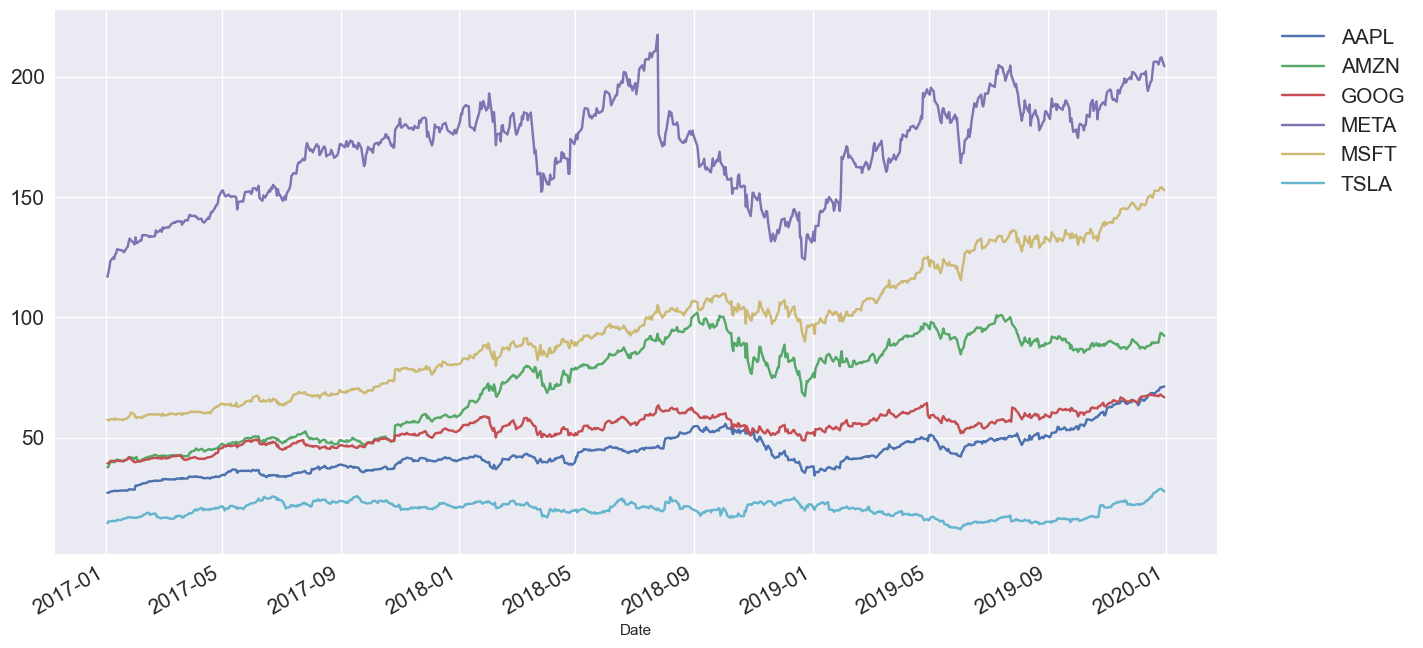

In [5]:
#Plot
adjclose = stocks.loc[:,'Adj Close'].copy()
adjclose.plot(figsize = (15,8), fontsize=15, )
plt.legend(fontsize=15,bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show


**1c)** Using the adjusted close of each of the 6 stocks generate the daily log return & show the new head of our df (1 Mark)

In [6]:
#Output head of df
log_ret = np.log(adjclose/adjclose.shift(1)).dropna()
log_ret.head()

,AAPL,AMZN,GOOG,META,MSFT,TSLA
Date,,,,,,
2017-01-04,-0.001120,0.004646,0.000966,0.015538,-0.004484,0.045055
2017-01-05,0.005073,0.030270,0.009007,0.016544,0.000000,-0.001058
2017-01-06,0.011086,0.019716,0.015161,0.022453,0.008630,0.009918
2017-01-09,0.009118,0.001168,0.000620,0.012001,-0.003188,0.009863
2017-01-10,0.001008,-0.001281,-0.002309,-0.004413,-0.000319,-0.006115


In [7]:
np.exp(log_ret.sum())  #check ans

AAPL    2.627398
AMZN    2.450529
GOOG    1.699621
META    1.749187
MSFT    2.657737
TSLA    1.911148
dtype: float64

In [8]:
adjclose.iloc[-1]/adjclose.iloc[0] #check ans

AAPL    2.627398
AMZN    2.450529
GOOG    1.699621
META    1.749187
MSFT    2.657737
TSLA    1.911148
dtype: float64

## Creating a Basket

As you can see the stocks perform at varying levels across these 4 years. We will look at trying to create a basket which is "sector neutral" such that it is unaffected by the sectors overall performance.

(Although simpliefied) We can do this by shorting the sector as much as we long it.

For a basket of 6 stocks we will allocate weightings of:

A -> +30%

B -> +15%

C -> +5%

D -> -5%

E -> -15%

F -> -30%

This way we have a total capital allocation of 100% but we have gone long (+)50% and shorted (-)50%. Overall our net position in the sector is 0%.

We can consider the daily returns from an individual stock in the basket (Basket_X_return) by using the formula:

Basket_X_return = Weight(X) * daily_return

Consider Asset E with a +10% daily return:

Basket_E_return = -0.15 x 0.1 = -0.015 = -1.5% return

Here the daily return from asset E in the basket is -1.5%.


2a) Consider the basket:

A = AAPL

B = META

C = GOOG

D = AMZN

E = MSFT

F = TSLA

**2a)** For each Stock Return Column of our df, use the Basket_X_Return formula to create an array/list of daily returns for each stock. What is the total return of our basket? (1 Mark)

In [29]:
#Using Close returns instead
daily_returns = np.log(adjclose.div(adjclose.shift(1)))
daily_returns.fillna(0, inplace=True)
daily_returns.head()

,AAPL,AMZN,GOOG,META,MSFT,TSLA
Date,,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,-0.001120,0.004646,0.000966,0.015538,-0.004484,0.045055
2017-01-05,0.005072,0.030270,0.009007,0.016544,0.000000,-0.001058
2017-01-06,0.011087,0.019716,0.015161,0.022453,0.008630,0.009918
2017-01-09,0.009118,0.001168,0.000620,0.012001,-0.003188,0.009863


In [30]:

basket_weights = [0.3, 0.15 ,0.05, -0.05, -0.15, -0.3]
basket_returns = daily_returns * basket_weights

basket_returns.head()

,AAPL,AMZN,GOOG,META,MSFT,TSLA
Date,,,,,,
2017-01-03,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
2017-01-04,-0.000336,0.000697,0.000048,-0.000777,0.000673,-0.013516
2017-01-05,0.001522,0.004540,0.000450,-0.000827,-0.000000,0.000317
2017-01-06,0.003326,0.002957,0.000758,-0.001123,-0.001295,-0.002975
2017-01-09,0.002735,0.000175,0.000031,-0.000600,0.000478,-0.002959


In [31]:
#Print total return
print("Basket X Return")
print((basket_returns.sum()))
print((basket_returns.sum().sum()))
print(np.exp((basket_returns.sum().sum())))



Basket X Return
AAPL    0.289798
AMZN    0.134446
GOOG    0.026520
META   -0.027958
MSFT   -0.146621
TSLA   -0.194311
dtype: float64
0.08187400116806262
1.0853190522812175


**2b)** Plot the Cumulative Return of our model vs the individual stocks (1 Mark)

In [32]:
daily_returns.cumsum()

,AAPL,AMZN,GOOG,META,MSFT,TSLA
Date,,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,-0.001120,0.004646,0.000966,0.015538,-0.004484,0.045055
2017-01-05,0.003952,0.034916,0.009974,0.032083,-0.004484,0.043997
2017-01-06,0.015039,0.054632,0.025135,0.054536,0.004146,0.053914
2017-01-09,0.024157,0.055800,0.025755,0.066537,0.000958,0.063778
...,...,...,...,...,...,...
2019-12-23,0.939860,0.866691,0.539865,0.567773,0.976332,0.658545
2019-12-24,0.940810,0.864575,0.535943,0.562619,0.976142,0.672826
2019-12-26,0.960456,0.908081,0.548399,0.575551,0.984305,0.686118


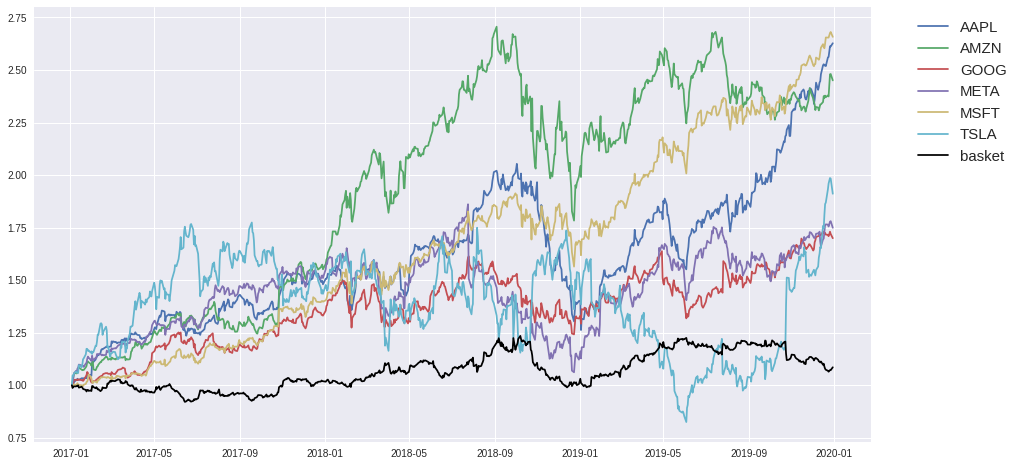

In [33]:
#Output plot of Cumulative return


plt.figure(figsize = (15,8))
total_basket_creturns = basket_returns.cumsum().sum(axis=1).apply(np.exp)
plt.plot(daily_returns.cumsum().apply(np.exp))
plt.plot(total_basket_creturns, color = 'black')
l = daily_returns.columns.to_list()
l.append('basket')



plt.legend(fontsize=15,bbox_to_anchor=(1.04, 1), loc="upper left", labels = l)



## Finding the Optimum Allocation

We have considered one possible combination our 6 stocks in the 6 slots (A-F)

**3a)** How many possible allocations are there for our 6 stocks in the 6 slots? (1 Mark)

In [10]:
#Print number of allocations
from itertools import permutations
print(len(list(permutations("ABCDEF", 6))))#change around the order of the slots 


720


Using combinations function for finding all variations.

Documentation: https://docs.python.org/3/library/itertools.html#itertools.combinations

**3b)** Generate all variations (1 Mark)

In [21]:
#Print List of all variations
enum = list(permutations("012345", 6))
#returns a permutation of indices e.g. 012345, 102345, 120345...

stockPermutations = []
for permutation in enum: #example: 543210
  temp = []
  for position in permutation: #append according to the order in the permutation (so ticker[5] goes first)
    temp.append(ticker[int(position)]) 
  stockPermutations.append(temp)

stockPermutations[:10] #check first 10 permutations

[['AAPL', 'META', 'GOOG', 'AMZN', 'MSFT', 'TSLA'],
 ['AAPL', 'META', 'GOOG', 'AMZN', 'TSLA', 'MSFT'],
 ['AAPL', 'META', 'GOOG', 'MSFT', 'AMZN', 'TSLA'],
 ['AAPL', 'META', 'GOOG', 'MSFT', 'TSLA', 'AMZN'],
 ['AAPL', 'META', 'GOOG', 'TSLA', 'AMZN', 'MSFT'],
 ['AAPL', 'META', 'GOOG', 'TSLA', 'MSFT', 'AMZN'],
 ['AAPL', 'META', 'AMZN', 'GOOG', 'MSFT', 'TSLA'],
 ['AAPL', 'META', 'AMZN', 'GOOG', 'TSLA', 'MSFT'],
 ['AAPL', 'META', 'AMZN', 'MSFT', 'GOOG', 'TSLA'],
 ['AAPL', 'META', 'AMZN', 'MSFT', 'TSLA', 'GOOG']]

**3c)** Iterate through each possible basket & save the total basket return, which arrangement generates the optimum log return? (2 Marks)

In [36]:
#Print Optimum Arrangement & it's return
basket_weights = [0.3, 0.15 ,0.05, -0.05, -0.15, -0.3]
basket_returns = daily_returns * basket_weights
#Print List of all variations
enum = list(permutations("012345", 6))
#returns a permutation of indices e.g. 012345, 102345, 120345...


returns = []


for permutation in enum:
  temp = []
  for position in permutation:
    temp.append(ticker[int(position)])
  sort_daily_returns = daily_returns[temp] #sort columns of dataframe using permutation of stocks
  basket_returns = sort_daily_returns * basket_weights;
  returns.append((basket_returns.sum()).sum())

highest_momentum_positive = max(returns)
print('highest return:',np.exp(highest_momentum_positive))
print(enum[returns.index(highest_momentum_positive)])
a=[ticker[int(i)]for i in enum[returns.index(highest_momentum_positive)]]
print(a)
print('arrangement: ', dict(zip(a,basket_weights)))

# we are permutating the stock tickers! Note that they are no longer printed in alphabetical order.
# the weights 30%, 15%, 5%, -5%, -15%, -30% are unchanged. 
# order doesn't matter as we are summing the returns together anyway

highest return: 1.2306928224057754
('4', '0', '3', '5', '1', '2')
['MSFT', 'AAPL', 'AMZN', 'TSLA', 'META', 'GOOG']
arrangement:  {'MSFT': 0.3, 'AAPL': 0.15, 'AMZN': 0.05, 'TSLA': -0.05, 'META': -0.15, 'GOOG': -0.3}


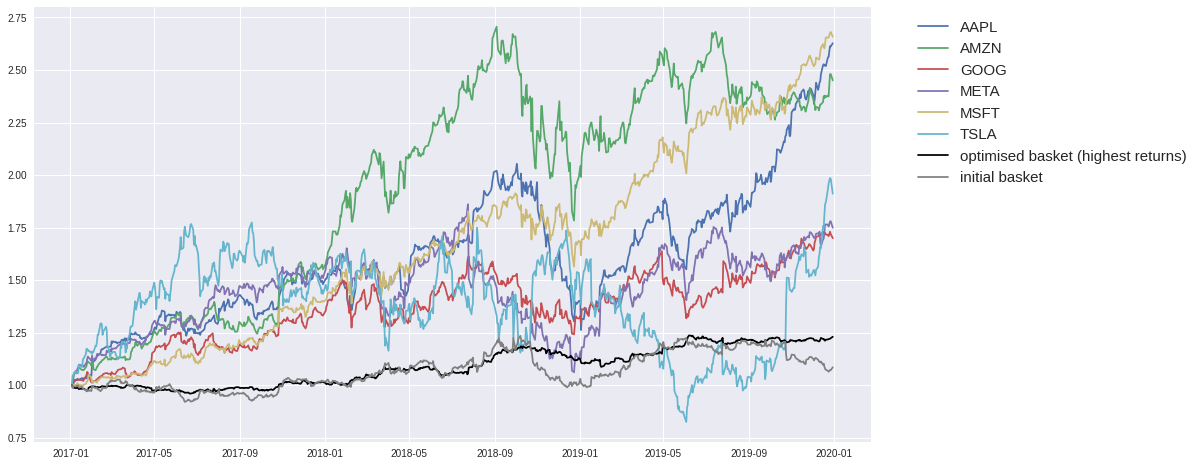

In [37]:
plt.figure(figsize = (15,8))
#plot individual stocks
plt.plot(daily_returns.cumsum().apply(np.exp))

#plot optimised basket weights (largest)
temp=[]
for position in enum[returns.index(max(returns))]:
    temp.append(ticker[int(position)])
sort_daily_returns = daily_returns[temp]
basket_returns = sort_daily_returns * basket_weights;
total_basket_creturns = basket_returns.cumsum().sum(axis=1).apply(np.exp)
plt.plot(total_basket_creturns, color = 'black')

#plot first basket weights
basket_returns = daily_returns * basket_weights;
total_basket_creturns = basket_returns.cumsum().sum(axis=1).apply(np.exp)
plt.plot(total_basket_creturns, color = 'grey')




l = daily_returns.columns.to_list()
l.append('optimised basket (highest returns)')
l.append('initial basket')



plt.legend(fontsize=15,bbox_to_anchor=(1.04, 1), loc="upper left", labels = l)

## Note that most optimised portfolio is simply the sorting of stocks in ascending order. 
## MSFT had the highest return at the end of the timeframe and was given the highest weighting (0.3)
## GOOG had the lowest return at the end of the timeframe and was shorted with the highest weighting (-0.3)


## Improving Our Strategy

**4)** For the chance to get 11/10: Recommend another way we could try and optimise a zero momentum basket. No right answers!

i.e. iterate through different possible A-F weightings ([+25%, +15%, +10%...]). 

We will use the Scipy optimise function for this, using the SLSQP Sequential Least SQuares Programming optimizer algo.

In [38]:
#using Scipy Optimize
from scipy.optimize import minimize

#use 6 variable weightings 
global daily_returns
global length

#define the objective function that returns the portfolio value times (-1), so basically this is argmax
def param_weights(basket_weights):
    basket_returns = daily_returns * basket_weights;
    return -basket_returns.cumsum().sum(axis=1).iloc[-1]

def constraints(x):
  return sum(map(abs, x))-1
#constraint 1: absolute value of weights must sum to 1
#since we are minimising, we subtract 1 as the function minimises the return value, so sum(map(abs, x)) tends to 1

cons = ({'type': 'eq', 'fun' : constraints}, {'type': 'eq', 'fun' : sum})
#constraint 2: net zero, sum of all weights must be zero


initial_guess = [0.25, 0.15, 0.1, -0.1, -0.15, -0.25]
#pick out a decently balanced initial guess

bnds = [(-1,1) for i in range(6)]
#obviously, the weights shouldn't exceed -1 short or 1 long

#weights = minimize(param_quality, initial_guess, constraints = cons, options={'maxiter':5}, callback=callbackF)
res = minimize(param_weights, initial_guess, method='SLSQP', bounds=bnds, constraints = cons)
res

     fun: -0.22340862568233386
     jac: array([-0.96599397, -0.89630384, -0.53040523, -0.55915116, -0.97747484,
       -0.64770415])
 message: 'Optimization terminated successfully'
    nfev: 762
     nit: 71
    njev: 71
  status: 0
 success: True
       x: array([ 1.09382612e-02, -3.61207103e-10, -4.99994961e-01, -3.21371460e-08,
        4.89061752e-01, -5.02003409e-06])

In [39]:
print("improved portfolio weighting:", res.x.round(3))
print('arrangement: ', dict(zip(ticker, res.x.round(3))))
print(sum(res.x))
## Note that the improved basket, funnily enough, decided to half long the highest performing stock MSFT, and half short the worst performing stock, GOOG
## and left all other stocks untouched. Not a good spread of risk unfortunately

improved portfolio weighting: [ 0.011 -0.    -0.5   -0.     0.489 -0.   ]
arrangement:  {'AAPL': 0.011, 'META': -0.0, 'GOOG': -0.5, 'AMZN': -0.0, 'MSFT': 0.489, 'TSLA': -0.0}
-2.0265263263059136e-17


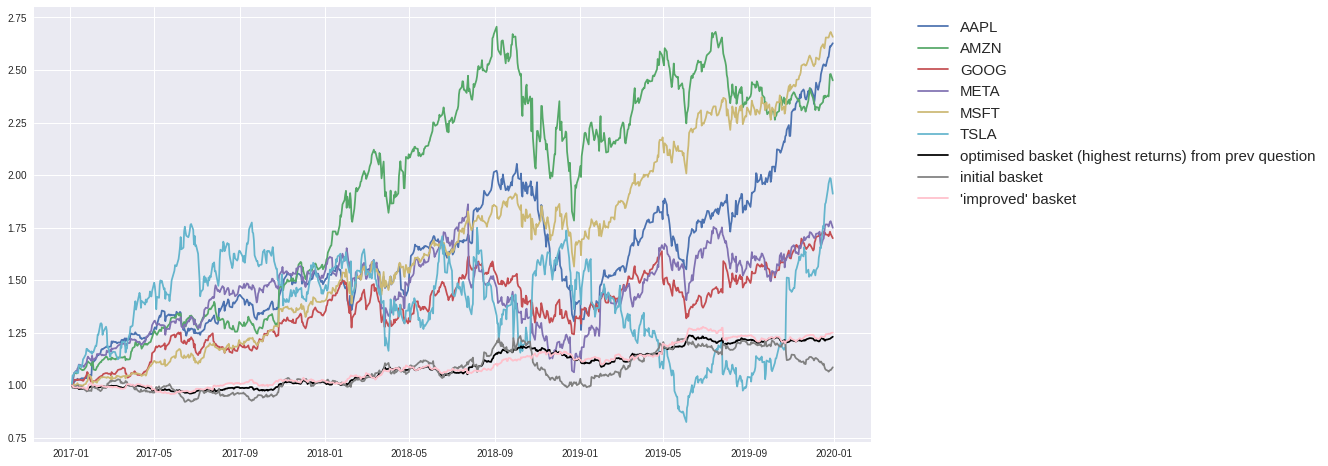

In [40]:
plt.figure(figsize = (15,8))
#plot individual stocks
plt.plot(daily_returns.cumsum().apply(np.exp))

#plot optimised basket weights (largest)
temp=[]
for position in enum[returns.index(max(returns))]:
    temp.append(ticker[int(position)])
sort_daily_returns = daily_returns[temp]
basket_returns = sort_daily_returns * basket_weights;
total_basket_creturns = basket_returns.cumsum().sum(axis=1).apply(np.exp)
plt.plot(total_basket_creturns, color = 'black')

#plot first basket weights
basket_returns = daily_returns * basket_weights;
total_basket_creturns = basket_returns.cumsum().sum(axis=1).apply(np.exp)
plt.plot(total_basket_creturns, color = 'grey')


#plot improved basket
basket_returns = daily_returns * res.x;
total_basket_creturns = basket_returns.cumsum().sum(axis=1).apply(np.exp)
plt.plot(total_basket_creturns, color = 'pink')



l = daily_returns.columns.to_list()
l.append('optimised basket (highest returns) from prev question')
l.append('initial basket')
l.append("'improved' basket")


plt.legend(fontsize=15,bbox_to_anchor=(1.04, 1), loc="upper left", labels = l)

## Note that the optimised basket is simply the sorting of stocks in ascending order. 
## MSFT had the highest return at the end of the timeframe and was given the highest weighting (0.3)
## GOOG had the lowest return at the end of the timeframe and was shorted with the highest weighting (-0.3)

## Note that the improved basket, funnily enough, decided to half long the highest performing stock MSFT, and half short the worst performing stock, GOOG
## and left all other stocks untouched. Not a good spread of risk unfortunately
#Performance is not that much better than the optimised basket (calculated from the previous exercise)


Note that the improved basket, funnily enough, decided to half long the highest performing stock MSFT, and half short the worst performing stock, GOOG.

To fix this, can set an additional constraint function which penalises the function if any of the weights gets too near zero. See comments for more info

improved portfolio weighting: [ 0.251  0.097 -0.412 -0.199  0.339 -0.077]
arrangement:  {'AAPL': 0.251, 'META': 0.097, 'GOOG': -0.412, 'AMZN': -0.199, 'MSFT': 0.339, 'TSLA': -0.077}
5.134781488891349e-16


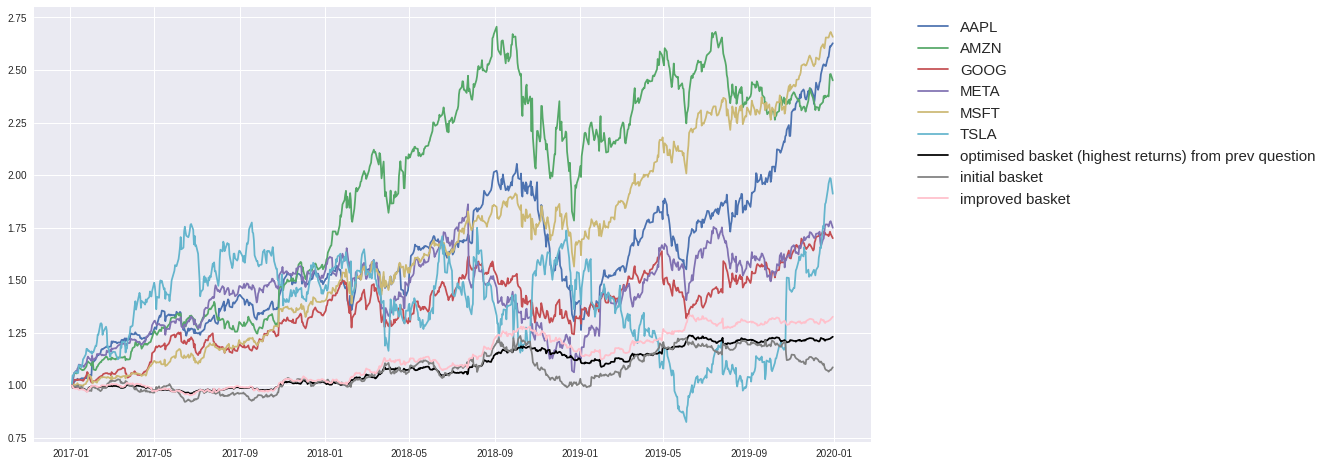

In [41]:
#use 6 variable weightings 
global daily_returns
global length

#define the objective function that returns the portfolio value times (-1), so basically this is argmax
def param_weights(basket_weights):
    basket_returns = daily_returns * basket_weights;
    return -basket_returns.cumsum().sum(axis=1).iloc[-1]

def constraints(x):
  return sum(map(abs, x))-1
#constraint 1: absolute value of weights must sum to 1
#since we are minimising the return value to be as close to 0 as possible, 
#we subtract 1 as the function minimises the return value, so sum(map(abs, x)) tends to 1

def constraints2(x):
  return sum(map(distanceFromZeroPenalty, x))
#constraint 2: we minimise the distance to zero penalty for each element in the weights array X

def distanceFromZeroPenalty(weight):
  return 1/(abs(weight)**0.000001)
  # each weight x scores highly the closer it is to zero.
  # We try to scale down the function by taking its power to a small number otherwise the model gets too afraid of being too near zero
  # and assigns all weights to be around abs(0.167) which isn't the best optimisation

cons = ({'type': 'eq', 'fun' : constraints}, {'type': 'eq', 'fun' : constraints2}, {'type': 'eq', 'fun' : sum},)
#constraint 2: net zero, sum of all weights must be zero

initial_guess = [0.25, 0.15, 0.1, -0.1, -0.15, -0.25]
#pick out a decently balanced initial guess

bnds = [(-1,1) for i in range(6)]
#obviously, the weights shouldn't exceed -1 short or 1 long

#weights = minimize(param_quality, initial_guess, constraints = cons, options={'maxiter':5}, callback=callbackF)
res2 = minimize(param_weights, initial_guess, method='SLSQP', bounds=bnds, constraints = cons)
print("improved portfolio weighting:", res2.x.round(3))
print('arrangement: ', dict(zip(ticker, res2.x.round(3))))
print(sum(res2.x))
plt.figure(figsize = (15,8))
#plot individual stocks
plt.plot(daily_returns.cumsum().apply(np.exp))

#plot optimised basket weights (largest)
temp=[]
for position in enum[returns.index(max(returns))]:
    temp.append(ticker[int(position)])
sort_daily_returns = daily_returns[temp]
basket_returns = sort_daily_returns * basket_weights;
total_basket_creturns = basket_returns.cumsum().sum(axis=1).apply(np.exp)
plt.plot(total_basket_creturns, color = 'black')

#plot first basket weights
basket_returns = daily_returns * basket_weights;
total_basket_creturns = basket_returns.cumsum().sum(axis=1).apply(np.exp)
plt.plot(total_basket_creturns, color = 'grey')



#plot imporved basket
temp=[]
basket_returns = daily_returns * res2.x;
total_basket_creturns = basket_returns.cumsum().sum(axis=1).apply(np.exp)
plt.plot(total_basket_creturns, color = 'pink')



l = daily_returns.columns.to_list()
l.append('optimised basket (highest returns) from prev question')
l.append('initial basket')
l.append('improved basket')


plt.legend(fontsize=15,bbox_to_anchor=(1.04, 1), loc="upper left", labels = l)


## Now that's better performance AND a more diverse spread!